#%% md
<div>
<img src="https://www.nebrija.com/images/logos/logotipo-universidad-nebrija.jpg" width="200">
</div>

**ALGORITMOS** -
Prof: Carmen Pellicer Lostao

# Algoritmo de Deutsch-Joza

In [1]:
# initialisation
import cmath
import math

import numpy as np

# Importing standard Qiskit libraries
from qiskit import (
    ClassicalRegister,
    QuantumCircuit,
    QuantumRegister,
    transpile,
)

# basic plot tools
from qiskit.visualization import array_to_latex, plot_bloch_multivector, plot_histogram
from qiskit_aer import Aer
from qiskit_ibm_provider import IBMProvider, least_busy

# Loading your IBM Quantum account(s)
provider = IBMProvider()



backend = Aer.get_backend("aer_simulator")

# ORACULOS

Podemos crear una __funcion de oráculo__ para n qubits que sea balanceada o constante:

- balanceada: con una funcion de paridad o suma binaria
- constante: que devuelva siempre 0 o siempre 1

## Oráculo con funcion balanceada

#### EJERCICIO

Construye un circuito con n qubits de entrada y 1 qubit de salida, que compute la salida como una suma binaria o funcion de paridad.

Ejecuta el circuito y construye el histograma de resultados

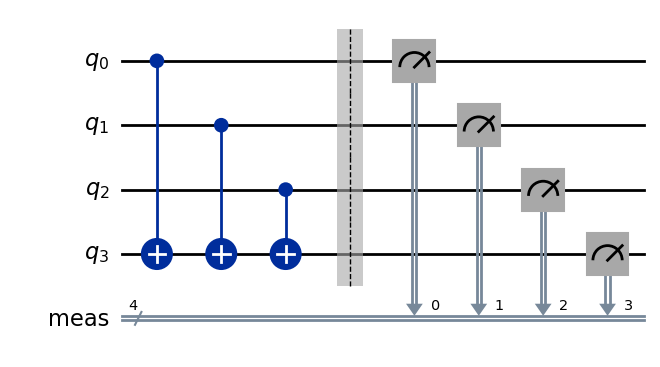

In [2]:
# BALANCEADA
# construimos un circuito de n+1 qubits con n bits de entrada y uno de salida que calcule la funcion paridad o suma binaria

n = 3  # por ejemplo
# creamos el circuito
circuit = QuantumCircuit(n + 1)

for bit in range(n):
    circuit.cx(bit, n)

# ponemos las puertas de medida
circuit.measure_all()

# lo dibujamos
display(circuit.draw('mpl', style='iqp'))


# Medimos que resultados da este circuito funcion
result = backend.run(circuit).result()

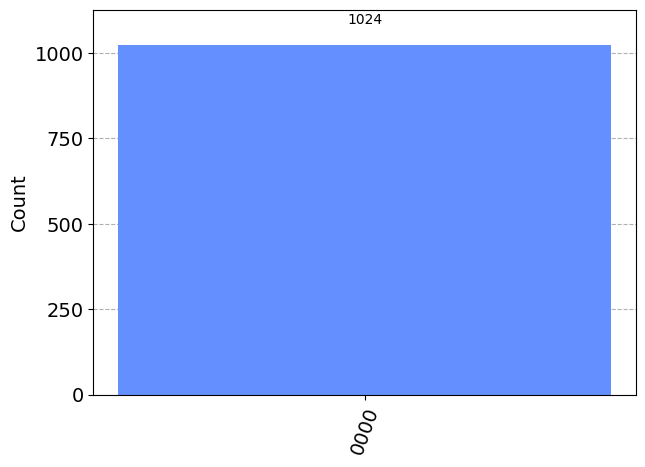

In [3]:
plot_histogram(result.get_counts())

Si ponemos los n __qubits del input__ en superposicion vemos como es la funcion binaria balanceada. Estamos ejecutando todas los valores de input posibles a la vez.

#### EJERCICIO

Pon todos los n qubits de la entrada en superposicion y calcula la salida del ciruito.

Para ello ejecuta el circuito, obten el histograma y muestra el resultado de las medidas obtendas con el siguiente formato:

```
INPUT------OUTPUT-----count----percent
000 ------ 0 ----- 106 ----- 0.103515625
001 ------ 1 ----- 136 ----- 0.1328125
010 ------ 1 ----- 135 ----- 0.1318359375
011 ------ 0 ----- 141 ----- 0.1376953125
100 ------ 1 ----- 104 ----- 0.1015625
101 ------ 0 ----- 125 ----- 0.1220703125
110 ------ 0 ----- 135 ----- 0.1318359375
111 ------ 1 ----- 142 ----- 0.138671875
shots totales 1024
```



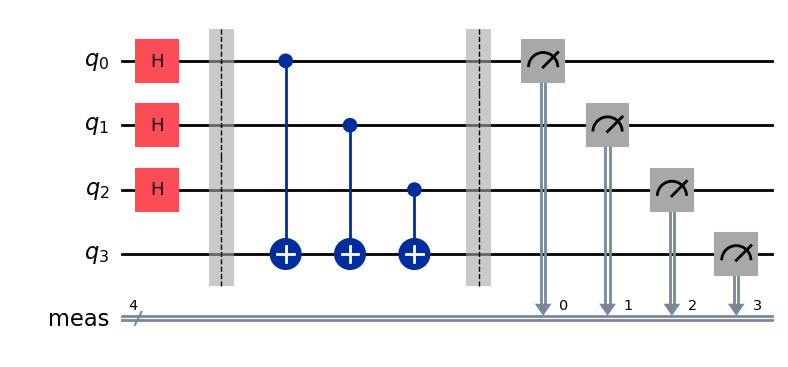

In [4]:
n = 3
# creamos el circuito
new_circuit = QuantumCircuit(n + 1)

new_circuit.h(range(n))
new_circuit.barrier()

circuit = new_circuit.compose(circuit)
# lo dibujamos
display(circuit.draw('mpl', style='iqp'))


# Medimos que resultados da este circuito funcion
result = backend.run(circuit).result()

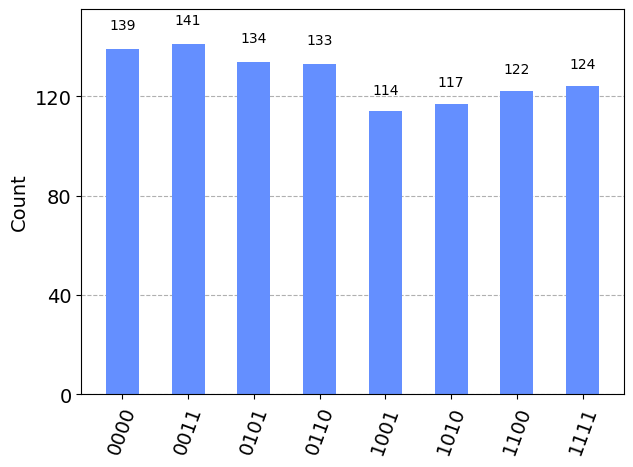

In [5]:
plot_histogram(result.get_counts())

Veamoslo como valores de entrada y salida digitales

In [6]:
# representacion de la salida en el formato especificado
from custom_utils import count_to_digital_values

count_to_digital_values(result.get_counts())

INPUT------OUTPUT-----count----percent
000 ------ 0 ----- 139 ----- 0.1357421875
001 ------ 1 ----- 122 ----- 0.119140625
010 ------ 1 ----- 117 ----- 0.1142578125
011 ------ 0 ----- 133 ----- 0.1298828125
100 ------ 1 ----- 114 ----- 0.111328125
101 ------ 0 ----- 134 ----- 0.130859375
110 ------ 0 ----- 141 ----- 0.1376953125
111 ------ 1 ----- 124 ----- 0.12109375
shots totales 1024


## Oraculo con funcion constante

Creamos una funcion binaria constante. Vamos a seleccionar aleatoriamente si queremos que la salida sea siempre 0 o siempre 1

#### EJERCICIO

Construye un circuito con n qubits de entrada y 1 qubit de salida, que compute la salida constante como 0 ó 1.

Calcula un numero aleatorio y en funcion de este numero, decide si la salida será 0 ó 1

Ejecuta el circuito poniendo todos los qubits de entrada en superposicion, obten el histograma y muestra el resultado de las medidas obtendas con el siguiente formato:

```
INPUT------OUTPUT-----count----percent
000 ------ 0 ----- 106 ----- 0.103515625
001 ------ 0 ----- 136 ----- 0.1328125
010 ------ 0 ----- 135 ----- 0.1318359375
011 ------ 0 ----- 141 ----- 0.1376953125
100 ------ 0 ----- 104 ----- 0.1015625
101 ------ 0 ----- 125 ----- 0.1220703125
110 ------ 0 ----- 135 ----- 0.1318359375
111 ------ 0 ----- 142 ----- 0.138671875
shots totales 1024
```

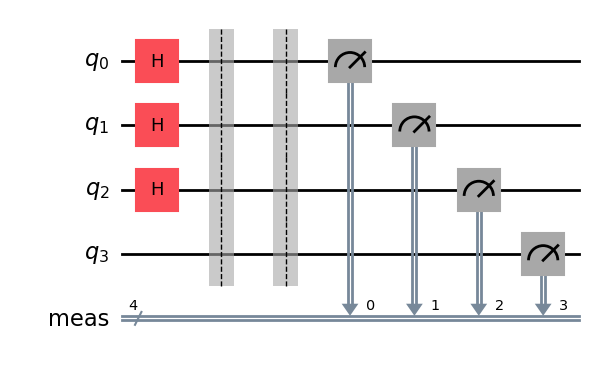

In [7]:
import random


n = 3
# creamos el circuito
circuit = QuantumCircuit(n + 1)

# ejecucion todas las entradas posibles de input en paralelo
circuit.h(range(n))
circuit.barrier()

# codificamos todo 1's o todo 0's a la salida de forma aleatoria
if random.randint(0, 1):
    circuit.x(n)

# ponemos las puertas de medida
circuit.measure_all()

# lo dibujamos
display(circuit.draw('mpl', style='iqp'))

# Medimos que resultados da este circuito funcion
result = backend.run(circuit).result()

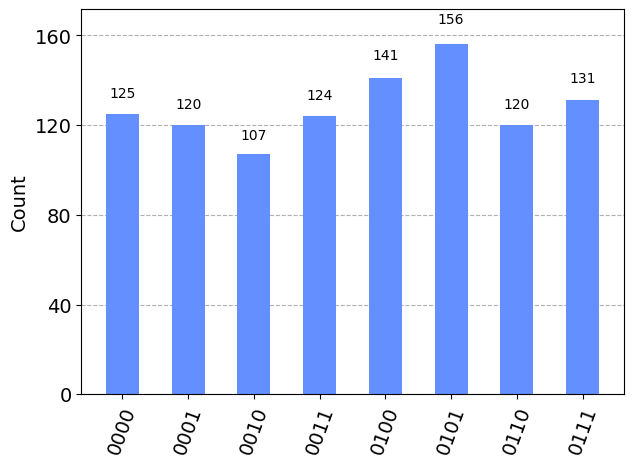

In [8]:
plot_histogram(result.get_counts())

In [9]:
count_to_digital_values(result.get_counts())

INPUT------OUTPUT-----count----percent
000 ------ 0 ----- 125 ----- 0.1220703125
001 ------ 0 ----- 141 ----- 0.1376953125
010 ------ 0 ----- 107 ----- 0.1044921875
011 ------ 0 ----- 120 ----- 0.1171875
100 ------ 0 ----- 120 ----- 0.1171875
101 ------ 0 ----- 156 ----- 0.15234375
110 ------ 0 ----- 124 ----- 0.12109375
111 ------ 0 ----- 131 ----- 0.1279296875
shots totales 1024


## Oraculo con funcion aleatoria

Con todo el codigo anterior definimos una funcion que de forma aleatoria va a decidir como crea el oraculo, si balanceado o constante (con 0's o 1's)

### EJERCICIO

Crea una funcion una funcion de oráculo que devuelva un circuito que computa una funcion constante o balanceada de forma aleatoria

In [10]:
def dj_oracle(n):
    #La funcion crea un objeto de QuantumCircuit y lo devuelve
    #El circuito del oraculo tiene n qubit de entrada y uno de salida -> en total n+1 qubits

    oracle_qc = QuantumCircuit(n+1)

    #sorteamos el tipo de funcion del oraculo 0=constante y 1=balanceada
    match random.randint(0,1):
        case 0:
            print("Constant oracle")
            if random.randint(0,1):
                oracle_qc.x(n)
            oracle_qc.x(n)
        case 1:
            print("Balanced oracle")
            oracle_qc.cx(range(n), n)

    oracle_qc.name = 'DJ-Oracle' 
    return oracle_qc

Lo ejecutamos en superposicion para ver la salida de la funcion del oráculo

Constant oracle


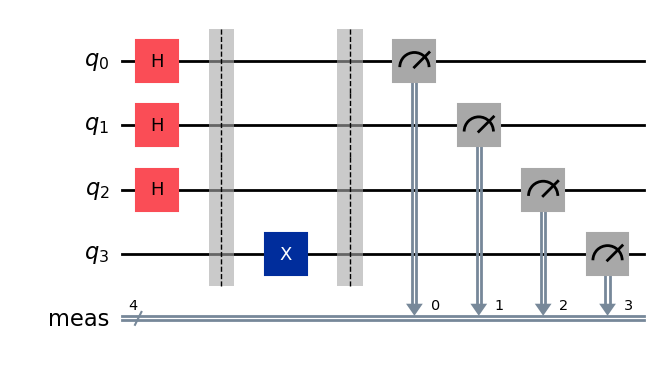

In [11]:
#Creamos un circuito de n qubits+1
n=3
circuit = QuantumCircuit(n+1)

#ponemos los qubits de entrada en superposicion
circuit.h(range(n))
circuit.barrier()

# Le añadimos el oráculo con funcion aleatoria  -> Utilizar el metodo.compose de la clase QuantumCircuit
circuit = circuit.compose(dj_oracle(n))

#ponemos las puertas de medida
circuit.measure_all()

#Mostramos el circuito
display(circuit.draw("mpl",style="iqp"))


#lo ejecutamos
result = backend.run(circuit).result()

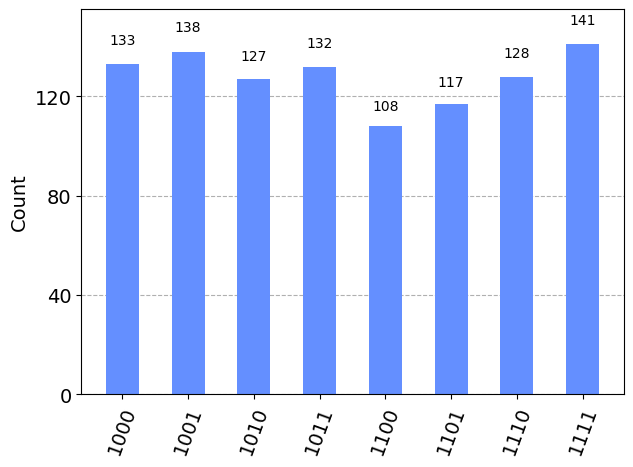

In [12]:
plot_histogram(result.get_counts())

In [13]:
count_to_digital_values(result.get_counts())

INPUT------OUTPUT-----count----percent
000 ------ 1 ----- 133 ----- 0.1298828125
001 ------ 1 ----- 108 ----- 0.10546875
010 ------ 1 ----- 127 ----- 0.1240234375
011 ------ 1 ----- 128 ----- 0.125
100 ------ 1 ----- 138 ----- 0.134765625
101 ------ 1 ----- 117 ----- 0.1142578125
110 ------ 1 ----- 132 ----- 0.12890625
111 ------ 1 ----- 141 ----- 0.1376953125
shots totales 1024


# Ejecucion del Algoritmo de Deusch-Jozsa

## Ejecucion Paso a Paso en el simulador

Vamos a hacer una ejecucion paso a paso viendo el vector de estados. Para ello vamos definir una funcion que nos ayudará a visualizar el vector de estados paso a paso

### EJERCICIO

Construye una funcion que tome como entrada un ciruito cuantico, lo ejecute, obtenga el vector de estados resultado y muestre por pantalla su valor en formato latex, las probabilidades y las fases de cada componente del vector

In [25]:
from custom_utils import get_probabilities, get_phases
from uuid import uuid4
from qiskit.quantum_info import Statevector
def svector_viz(qc):
    identifier = str(uuid4())
    #tomamos un circuito sin medidas
    #medimos el estado, hay que salvar el vector de estados del circuito (en lugar de poner puertas de medida)
    sv = Statevector.from_instruction(qc)
    #imprimimos el vector en latex
    display(array_to_latex(sv))
    #imprimimos las probabilidades de cada estado de la base
    display('probabilities', get_probabilities(sv))
    #imprimimos las pases de cada estado de la base
    display('phases', get_phases(sv))
    #visualizamos el plot_bloch_multivector
    display(plot_bloch_multivector(sv, reverse_bits=True))

Ejecutamos paso a paso el algoritmo, que no es más que poner en superposicion los estados de los qubits del registro de entrada y de salida:

- en el registro de entrada, todos los qubits deben de estar en el estado |+>
- en el registro de salida el qubit debe de estar en el estado |->

El oraculo es aleatorio y el algoritmo nos dira en una sola ejecucion si la funcion es constante cuando el registro de entrada quede en estado |00...0>. En caso contrario la funcion es balanceada

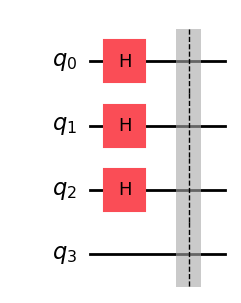

<IPython.core.display.Latex object>

'probabilities'

array([0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ])

'phases'

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

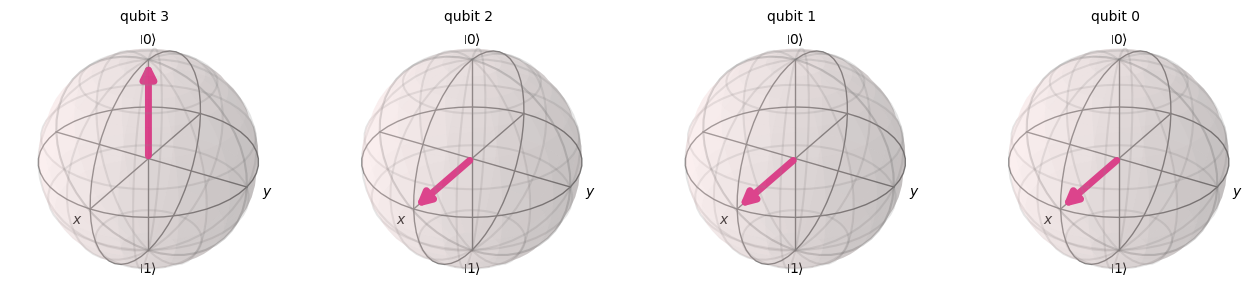

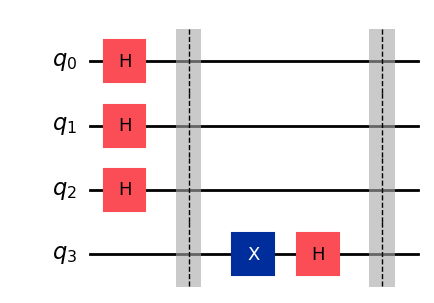

<IPython.core.display.Latex object>

'probabilities'

array([0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625,
       0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625])

'phases'

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 180., 180., 180.,
       180., 180., 180., 180., 180.])

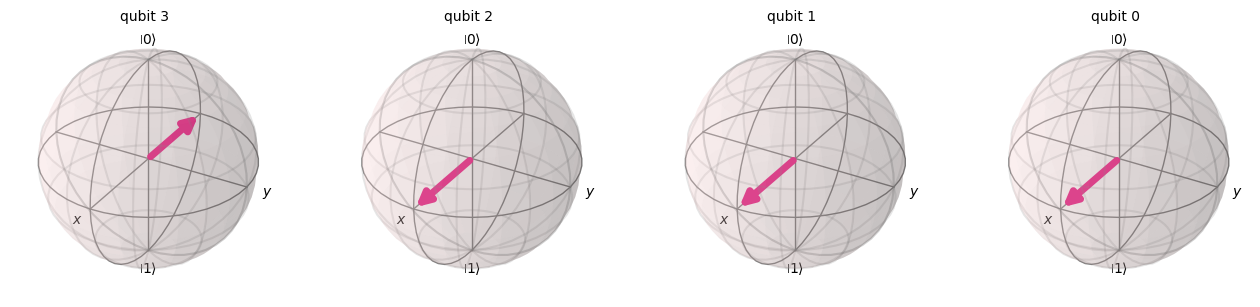

Balanced oracle


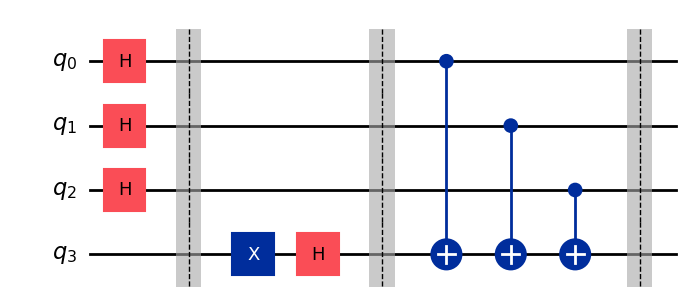

<IPython.core.display.Latex object>

'probabilities'

array([0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625,
       0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625])

'phases'

array([  0., 180., 180.,   0., 180.,   0.,   0., 180., 180.,   0.,   0.,
       180.,   0., 180., 180.,   0.])

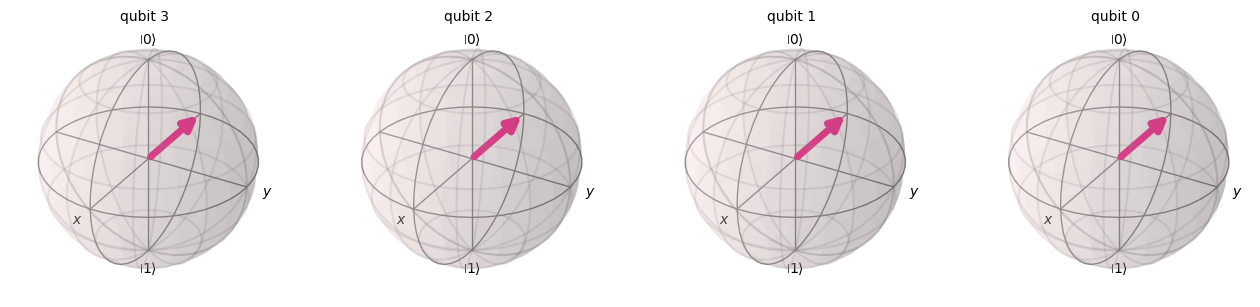

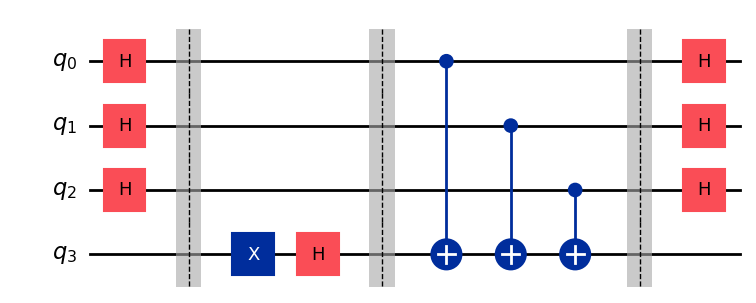

<IPython.core.display.Latex object>

'probabilities'

array([4.31629312e-102, 4.21868913e-067, 1.50130939e-068, 9.07105347e-035,
       7.97788531e-069, 2.78853010e-034, 4.53552674e-035, 5.00000000e-001,
       4.31629312e-102, 4.21868913e-067, 1.50130939e-068, 9.07105347e-035,
       7.97788531e-069, 2.78853010e-034, 4.53552674e-035, 5.00000000e-001])

'phases'

array([180.,   0.,   0., 180.,   0.,   0.,   0.,   0.,   0., 180., 180.,
         0., 180., 180., 180., 180.])

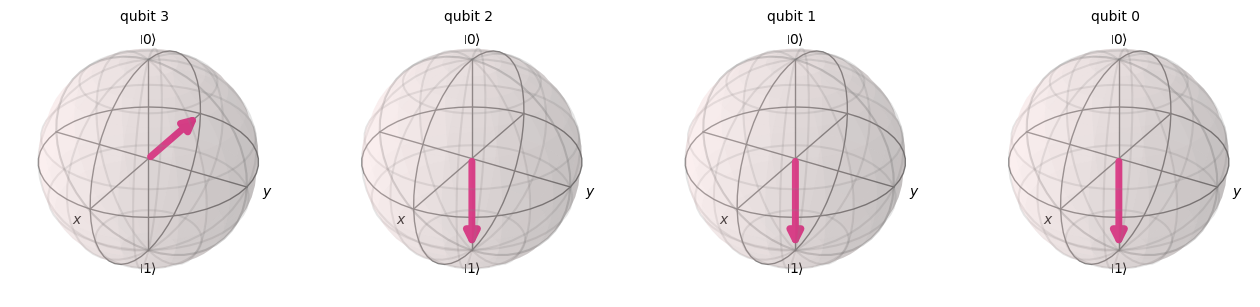

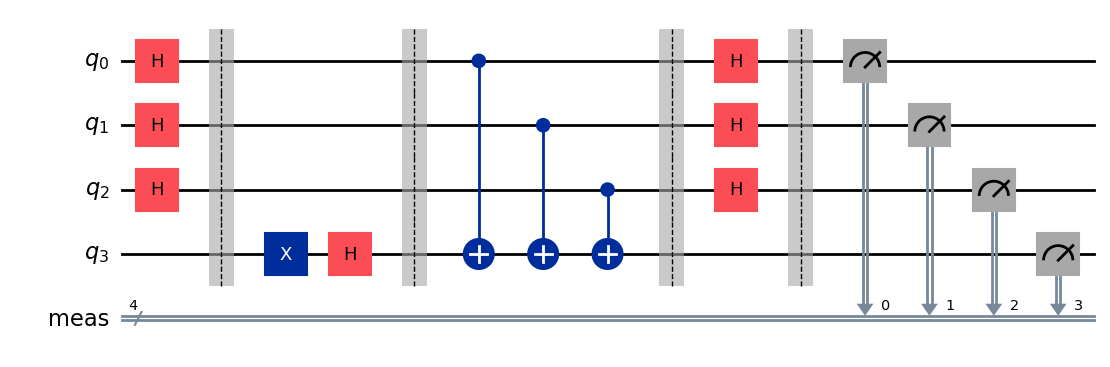

QiskitError: 'Cannot apply instruction with classical bits: measure'

In [29]:
#Creamos un circuito de n qubits+1
n=3
circuit = QuantumCircuit(n+1)

#PASO 1 - ponemos los qubits de entrada en superposicion
circuit.h(range(n))
circuit.barrier()
display(circuit.draw('mpl', style='iqp'))
svector_viz(circuit)

#ponemos el qubit de salida
circuit.x(n)
circuit.h(n)
circuit.barrier()
display(circuit.draw('mpl', style='iqp'))
svector_viz(circuit)

# PASO 2- Le añadimos el oráculo con funcion aleatoria
circuit = circuit.compose(dj_oracle(n))
circuit.barrier()
display(circuit.draw('mpl', style='iqp'))
svector_viz(circuit)

#PASO 3 - Le añadimos las puertas Hadamard
circuit.h(range(n))
display(circuit.draw('mpl', style='iqp'))
svector_viz(circuit)

#PASO 4- ponemos las puertas de medida solo para los qubits de la entrada
circuit.measure_all()
display(circuit.draw('mpl', style='iqp'))
svector_viz(circuit)

# Ejecucion en un Simulador con ruido

### EJERCICIO

Ejecuta en un simulador con ruido el circuito con el algoritmo de Detsch-Joza, para ello:

- Creamos el circuito cuántico, que llamamos <b>dj_circuit </b>
- Preparamos un simulador con el ruido de un dispositivo real, el `ibmq_vigo`.
- Transpilamos el circuito y lo ejecutamos en el simulador

Balanced oracle


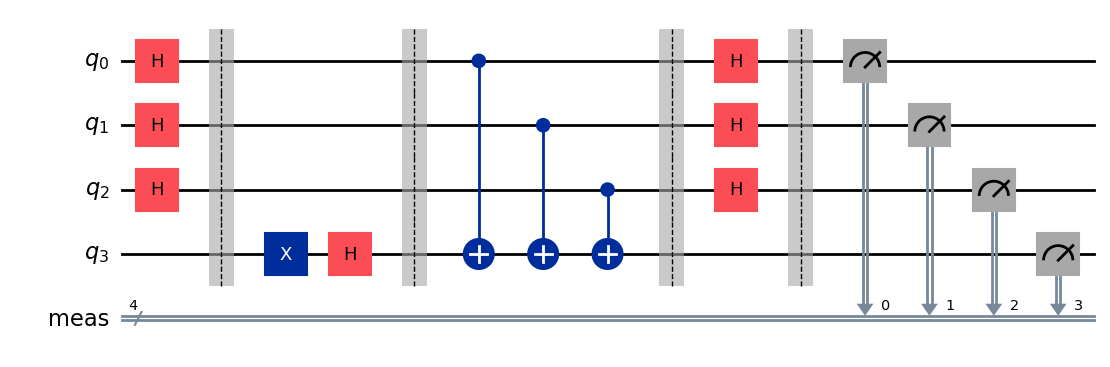

In [31]:
#Creamos un circuito de n qubits+1
n=3
circuit = QuantumCircuit(n+1)

#PASO 1 - ponemos los qubits de entrada en superposicion
circuit.h(range(n))
circuit.barrier()

#ponemos el qubit de salida
circuit.x(n)
circuit.h(n)
circuit.barrier()

# PASO 2- Le añadimos el oráculo con funcion aleatoria
circuit = circuit.compose(dj_oracle(n))
circuit.barrier()

#PASO 3 - Le añadimos las puertas Hadamard
circuit.h(range(n))


#PASO 4- ponemos las puertas de medida solo para los qubits de la entrada
circuit.measure_all()


#Mostramos el circuito
display(circuit.draw("mpl",style="iqp"))

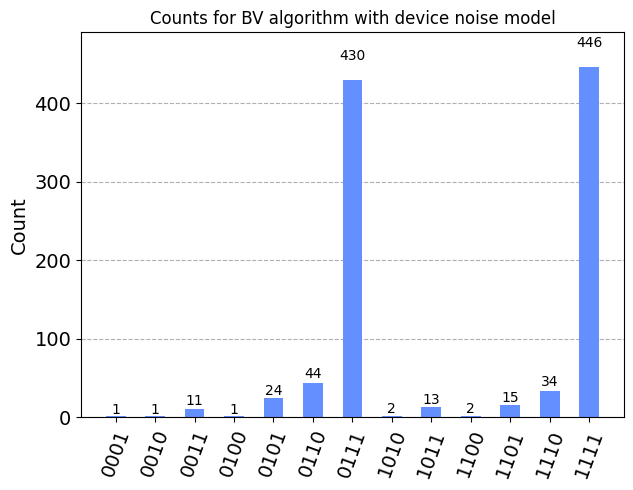

In [32]:
from qiskit_ibm_runtime.fake_provider import FakeVigo
from qiskit_aer import AerSimulator

# Tomamos un backend ruidoso ficticio de fake providers
device_backend = FakeVigo()

# creamos el simulador
sim_vigo = AerSimulator.from_backend(device_backend)

# Transpilamos el circuito para mapearlo a las puertas ruidosass
tcirc = transpile(circuit, backend=device_backend)

# Ejecutamos el circuito y obtenemos el resultado
result_noise = sim_vigo.run(circuit).result()
counts_noise = result_noise.get_counts(0)
plot_histogram(counts_noise, title="Counts for BV algorithm with device noise model")

# Ejecucion en un BackEnd cuántico real

### EJERCICIO

Ejecuta en un backend real cuantico el circuito con el algoritmo de Detsch-Joza, para ello:

- Creamos el circuito cuántico, que llamamos <b>dj_circuit </b>
- Lo ejecutamos primero en el simulador para ver si funciona bien antes de enviarlo a un BackEnd cuántico real
- Buscamos el backend que este menos cargado de trabajos
- Transpilamos el circuito y lo enviamos para ejecucion

In [33]:
# buscamos el backend menos ocupado - using a real qc backend: lest busy
backend = least_busy(
    provider.backends(
        filters=lambda x: x.configuration().n_qubits >= (n + 1)
        and not x.configuration().simulator
        and x.status().operational == True
    )
)
print("least busy backend: ", backend)

least busy backend:  <IBMBackend('ibm_osaka')>


In [34]:
import qiskit_ibm_provider.jupyter  # noqa: F401

#lanzamos la ejecucion del job
shots = 2000
job = backend.run(transpile(circuit, backend), shots=shots, )  #optimiza automaticamente para el layout map de qubits (coge el layout optimio y simplifica puertas si puede hacerlo)

%ibm_quantum_dashboard

print('backend: ', backend)
print(job.job_id())

AccordionWithThread(children=(Tab(children=(Box(children=(VBox(layout=Layout(height='100%', width='740px')),),…

<IPython.core.display.Javascript object>

backend:  <IBMBackend('ibm_osaka')>
cqch85g3ptq00086xe1g


Y cuando termine la ejecucion, consultaremos el resultado